In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def dataset_g(u_vec):
    n = len(u_vec)
    # Inicializamos un array de ceros para almacenar los resultados (shape: nx2)
    g_output = np.zeros((n, 2))

    # Condición 1: 0 <= u < 0.25
    mask1 = (u_vec >= 0) & (u_vec < 0.25)
    g_output[mask1, 0] = 0
    g_output[mask1, 1] = 4 * u_vec[mask1]

    # Condición 2: 0.25 <= u < 0.5
    mask2 = (u_vec >= 0.25) & (u_vec < 0.5)
    g_output[mask2, 0] = 2 * u_vec[mask2] - 0.5
    g_output[mask2, 1] = 1.5 - 2 * u_vec[mask2]

    # Condición 3: 0.5 <= u < 0.75
    mask3 = (u_vec >= 0.5) & (u_vec < 0.75)
    g_output[mask3, 0] = 2 * u_vec[mask3] - 0.5
    g_output[mask3, 1] = 2 * u_vec[mask3] - 0.5

    # Condición 4: 0.75 <= u <= 1
    mask4 = (u_vec >= 0.75) & (u_vec <= 1)
    g_output[mask4, 0] = 1
    g_output[mask4, 1] = 4 - 4 * u_vec[mask4]

    return g_output


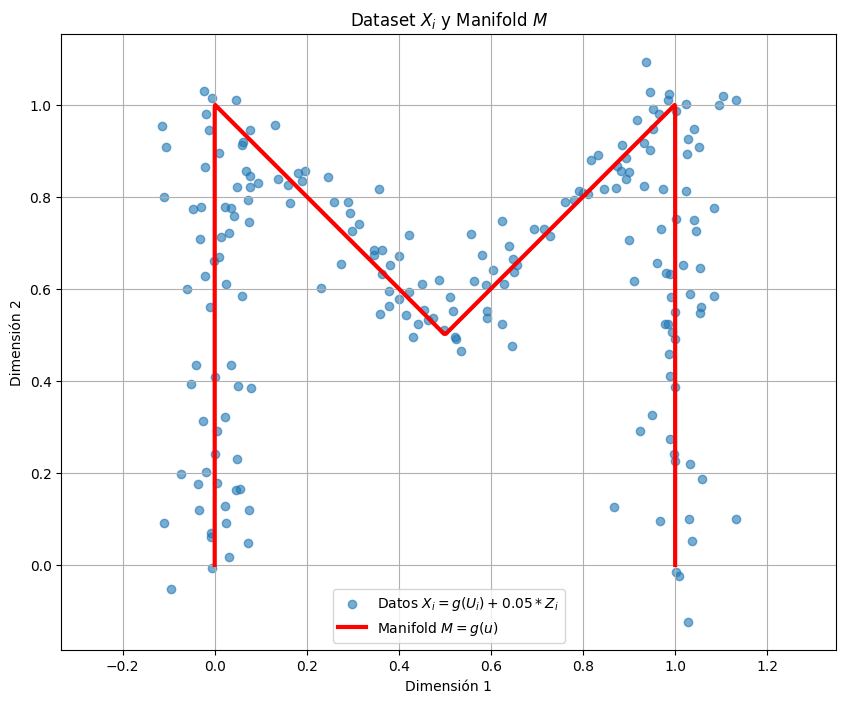

In [25]:
n_samples = 200

np.random.seed(22)
U_random = np.random.rand(n_samples)

Z = np.random.randn(n_samples, 2) #normal 0, 1

#Se le aplica la transformacion
# X_i = g(U_i) + 0.05 * Z_i
X = dataset_g(U_random) + 0.05 * Z


u_mainfold = np.linspace(0, 1, 500)

# Calculamos los puntos (x, y) del manifold M
M = dataset_g(u_mainfold)


plt.figure(figsize=(10, 8))
# Punto 2: Graficar un scatter de los datos
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, label='Datos $X_i = g(U_i) + 0.05 * Z_i$')

# Punto 3: Graficar la curva representativa del manifold M
plt.plot(M[:, 0], M[:, 1], color='red', linewidth=3, label='Manifold $M = g(u)$')

plt.title('Dataset $X_i$ y Manifold $M$')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.axis('equal') # Importante para ver la forma real
plt.show()

**K-Means**


El algoritmo K-Means es un método de clustering que agrupa un conjunto de datos en k subconjuntos (o clusters) según su distancia euclídea.
Comienza eligiendo k centroides iniciales de forma aleatoria y luego, de manera iterativa, asigna cada punto de datos al centroide más cercano.
Posteriormente, actualiza la posición de cada centroide como la media de los puntos asignados a su grupo.
Este proceso se repite hasta que los centroides dejan de moverse significativamente o se alcanza un criterio de convergencia.

In [26]:
class Kmeans:

    def __init__(self, K, max_iters=100):
        self.K = K
        self.max_iters = max_iters
        self.centroids = None

    def fit(self, X):
        n_samples, n_features = X.shape
        random_indices = np.random.choice(n_samples, self.K, replace=False) #genera k indices aleatorios entre 0 y samples, sin reposicion
        self.centroids = X[random_indices]

        for i in range(self.max_iters):

            distances = np.zeros((n_samples, self.K))

            # Calcular la distancia de cada punto a cada centroide
            for k in range(self.K):
                dist_k = np.linalg.norm(X - self.centroids[k, :], axis=1)
                distances[:, k] = dist_k

            # Asignar la etiqueta del centroide más cercano
            labels = np.argmin(distances, axis=1)

            centroides_nuevos = np.zeros((self.K, n_features))
            for k in range(self.K):
                cluster_k = X[labels == k] #me quedo con todos los asociados al cluster k
                # Comprobar que el cluster no esté vacío
                if len(cluster_k) > 0:
                    centroides_nuevos[k] = np.mean(cluster_k, axis=0) #nuevo centroide del cluster
                else:
                    # Si un cluster queda vacío, lo re-inicializamos
                    # en un punto aleatorio para evitar errores
                    centroides_nuevos[k] = X[np.random.choice(n_samples)]

            #calculo la diferencia entre centroides en cada iteracion para evaluar convergencia
            diff = np.linalg.norm(centroides_nuevos - self.centroids)
            if diff < 1e-4:
                print(f"Convergió en la iteración {i+1}")
                break
            # Actualizar los centroides para la siguiente iteración
            self.centroids = centroides_nuevos

    def predict(self, X):
        n_samples = X.shape[0]
        distances = np.zeros((n_samples, self.K))

        # Calcular la distancia de cada punto a cada centroide
        for k in range(self.K):
            dist_k = np.linalg.norm(X - self.centroids[k, :], axis=1)
            distances[:, k] = dist_k
        # Asignar la etiqueta del centroide más cercano
        labels = np.argmin(distances, axis=1)
        return labels


Convergió en la iteración 14


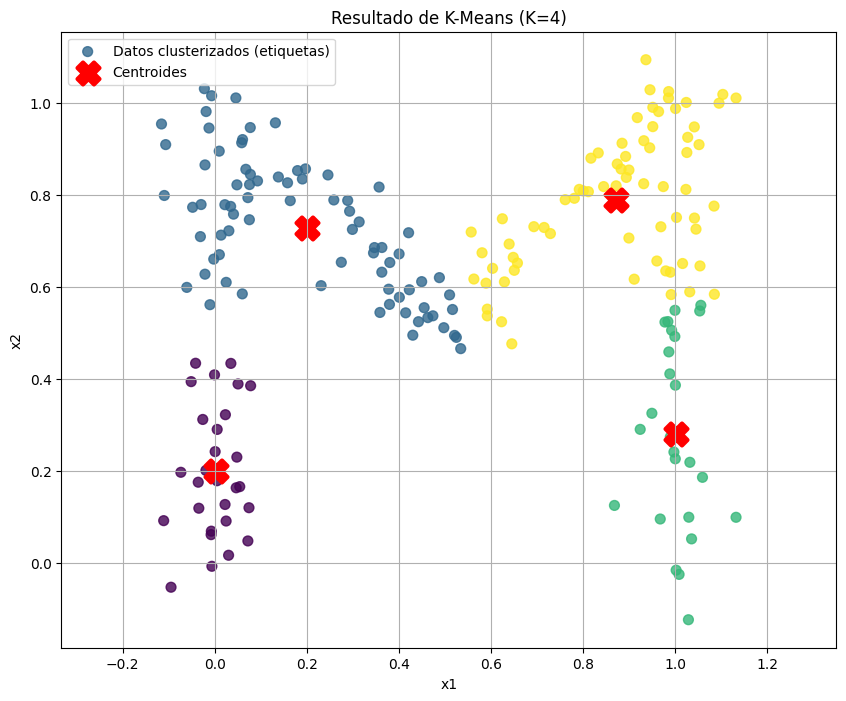

In [27]:
#defino el modelo, k=4, la m tiene 4 segmentos
kmeans_model = Kmeans(K=4, max_iters=100)

kmeans_model.fit(X)

labels = kmeans_model.predict(X)

plt.figure(figsize=(10, 8))

# Graficar los puntos de datos, coloreados por su etiqueta (cluster)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.8, s=50,
            label='Datos clusterizados (etiquetas)')

# Graficar los centroides finales
plt.scatter(kmeans_model.centroids[:, 0], kmeans_model.centroids[:, 1],
            c='red', marker='X', s=250, linewidth=3,
            label='Centroides')

plt.title(f'Resultado de K-Means (K={4})')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

No, el algoritmo K-Means no es completamente suficiente para describir adecuadamente este manifold. Esto se debe a que K-Means asume que los clusters tienen una forma aproximadamente esférica y están separados linealmente en el espacio de características, lo cual no se cumple en este caso, ya que los datos se distribuyen a lo largo de una curva no lineal y continua.

Como resultado, el algoritmo tiende a dividir el manifold según la distancia euclídea, generando particiones que no respetan su estructura original. Si bien puede utilizarse como una aproximación inicial para segmentar el manifold en regiones locales (sobre las cuales luego se aplica un PCA independiente), por sí solo no logra capturar la geometría global no lineal de los datos.


### Algoritmo EM (Expectation-Maximization)

El algoritmo **EM** es un método iterativo usado para estimar los parámetros de un modelo de **mezcla de Gaussianas**, donde se asume que los datos provienen de \( K \) distribuciones normales diferentes.

Cada componente \( k \) del modelo se describe por:
- una **media** ${\mu}_k$,
- una **matriz de covarianza** ${\Sigma}_k$,
- y un **peso de mezcla** $c_k$ tal que $\sum_k c_k = 1 $.

El modelo total se expresa como:

$$
p(\mathbf{x}) = \sum_{k=1}^{K} c_k \, \mathcal{N}(\mathbf{x} \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)
$$

El proceso se compone de dos pasos principales, que se repiten hasta la convergencia:

#### 1.Paso E (Expectation)
Se calcula la **probabilidad de pertenencia** de cada punto $x_i$ a cada componente k:

$$
q_{ik} =
\frac{
c_k \, \mathcal{N}(\mathbf{x}_i \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)
}{
\sum_{j=1}^{K} \pi_j \, \mathcal{N}(\mathbf{x}_i \mid \boldsymbol{\mu}_j, \boldsymbol{\Sigma}_j)
}
$$

Esto indica cuánto peso tiene cada punto dentro de cada cluster.

#### 2. Paso M (Maximization)
Se actualizan los parámetros del modelo usando esas probabilidades:

$$
N_k = \sum_{i=1}^{N} q_{ik}
$$

$$
c_k = \frac{N_k}{N}, \quad
\boldsymbol{\mu}_k = \frac{1}{N_k} \sum_{i=1}^{N} q_{ik} \mathbf{x}_i
$$

$$
\boldsymbol{\Sigma}_k = \frac{1}{N_k} \sum_{i=1}^{N} q_{ik}
(\mathbf{x}_i - \boldsymbol{\mu}_k)(\mathbf{x}_i - \boldsymbol{\mu}_k)^T
$$


El algoritmo termina cuando la **verosimilitud logarítmica** deja de cambiar significativamente:

$$
\log L = \sum_{i=1}^{N} \log \left( \sum_{k=1}^{K}
c_k \, \mathcal{N}(\mathbf{x}_i \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)
\right)
$$

En resumen, EM alterna entre estimar qué tan probable es que cada punto pertenezca a cada cluster (E-step) y actualizar los parámetros del modelo (M-step) hasta alcanzar una solución estable.


In [28]:
class EM:
    def __init__(self, K, max_iters=100, tol=1e-4):
        self.K = K
        self.max_iters = max_iters
        self.tol = tol
        self.mu = None          # medias (centroides)
        self.Sigma = []       # matrices de covarianza
        self.pi = None          # pesos de mezcla

    def fit(self, X , mu_init=None):
        n, d = X.shape
        # Inicialización
        if mu_init is not None:
            self.mu = mu_init #si viene definida por parametro se selecciona esa media
        else:
            random_idx = np.random.choice(n, self.K, replace=False) #sino elijo un punto aleatorio
            self.mu = X[random_idx]

        for k in range(self.K):
            self.Sigma.append(np.cov(X.T))

        #x.t para que sea variable - observacion

        self.pi = np.ones(self.K) / self.K #inicializo los pesos como 1/k, equiprobables

        log_likelihood_old = -np.inf #inicializo la penalizacion en el maximo para que no corte antes de tiempo

        # Iteraciones EM
        qs = np.zeros((n, self.K))
        p_x = np.zeros(n)
        for iteracion in range(self.max_iters):
            # ---------- E ----------
            qs = self.predict_proba(X)#obtengo la probabilidad a posteriori de que z = k dado que observaste x

            # ---------- M ----------
            N_k = np.sum(qs, axis=0)      # peso total de cada cluster
            self.pi = N_k / n                # actualizar pesos de mezcla
            self.mu = (qs.T @ X) / N_k[:, np.newaxis]  # nuevas medias

            # nuevas covarianzas
            self.Sigma = []
            for k in range(self.K):
                cov_k = ((X - self.mu[k]).T @ ((X - self.mu[k]) * qs[:, [k]])) / N_k[k]
                self.Sigma.append(cov_k + 1e-6 * np.eye(d))  # regularización

            # ---------- Verificar convergencia ----------
            for k in range(self.K):
                p_x += self.pi[k] * self.func_gausseana(X, self.mu[k], self.Sigma[k])

            # Luego calculo la log-verosimilitud total
            log_likelihood = np.sum(np.log(p_x))


            if np.abs(log_likelihood - log_likelihood_old) < self.tol:
                print(f"Convergió en la iteración {iteracion+1}")
                break

            log_likelihood_old = log_likelihood


    # te dice cual es el cluster mas cercano p(z=k|x)
    def predict(self, X):
        qs = self.predict_proba(X)
        return np.argmax(qs, axis=1)

    #te devuelve la probabilidad de cada cluster
    def predict_proba(self, X):
        n = X.shape[0]
        qs = np.zeros((n, self.K))
        for k in range(self.K):
            qs[:, k] = self.pi[k] * self.func_gausseana(X, self.mu[k], self.Sigma[k])
        qs = qs / np.sum(qs, axis=1, keepdims=True) #normalizo
        return qs

    #funcion de la gausseana
    def func_gausseana(self, X, mu, Sigma):
        n, d = X.shape
        det = np.linalg.det(Sigma)
        inv = np.linalg.inv(Sigma)
        norm = 1.0 / np.sqrt((2 * np.pi) ** d * det)
        diff = X - mu
        expo = np.exp(-0.5 * np.sum(diff @ inv * diff, axis=1))
        return norm * expo





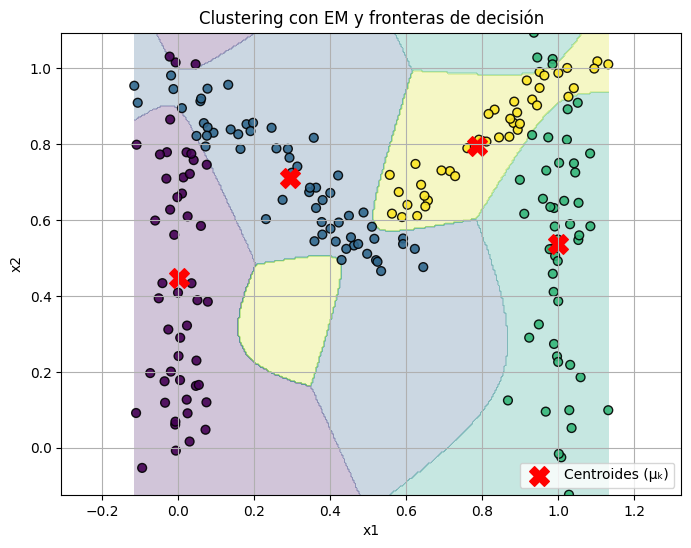

In [29]:
#defino el modelo
em = EM(K=4, max_iters=100)
em.fit(X, mu_init=kmeans_model.centroids) #incializo en los centroides calculados con kmeans
predict_em = em.predict(X)

#armo el grid
x_min, x_max = X[:, 0].min() , X[:, 0].max()
y_min, y_max = X[:, 1].min() , X[:, 1].max()

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = em.predict(grid_points)
Z = Z.reshape(xx.shape)

# Graficar fronteras de decisión (fondos coloreados)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.25)

#  Graficar los puntos originales, coloreados por cluster asignado
plt.scatter(X[:, 0], X[:, 1], c=predict_em, cmap='viridis', s=40, edgecolor='k', alpha=0.9)

#  Graficar las medias (centroides gaussianos finales)
plt.scatter(em.mu[:, 0], em.mu[:, 1], c='red', marker='X', s=200, label='Centroides (μₖ)')

plt.title('Clustering con EM y fronteras de decisión')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()



En la primera etapa se aplicó el algoritmo **K-Means** para realizar una partición inicial de los datos.  
Como resultado, los agrupamientos obtenidos no lograron capturar adecuadamente la estructura real de los datos, especialmente en zonas donde los clusters se superponen o tienen distintas orientaciones.

Al aplicar el modelo **EM** inicializado con los centroides obtenidos por K-Means, se observaron **mejoras significativas**:
K-Means provee una estimación inicial de las medias ${\mu}_k$ que acelera la convergencia de EM y evita mínimos locales inadecuados.EM estima también las covarianzas $\Sigma{_k}$ y los pesos $c_k$, permitiendo adaptar la forma y tamaño de cada cluster a los datos reales.


Tambien hace una asignación suave
cada punto tiene una probabilidad de pertenencia a cada cluster, lo cual mejora el comportamiento en regiones de solapamiento y produce fronteras de decisión más suaves.

A diferencia de K-Means (que separa el espacio mediante planos perpendiculares y asume clusters esféricos), EM puede ajustar elipses orientadas que se adaptan a la forma y orientación local de los datos. Esto le permite seguir mejor la geometría real del conjunto,por ejemplo, alineándose con tramos curvos o direcciones dominantes del manifold y representar con mayor precisión la distribución real del mismo.

En síntesis, EM mejora los resultados de K-Means al incorporar un enfoque estadístico que considera la varianza y la incertidumbre de las muestras.  
Esto se refleja en clusters más coherentes y una separación más fiel a la estructura probabilística de los datos.

Se puede pensar a k-means como un caso degenerado de em


In [30]:
class PCA:
    def __init__(self):
        self.mean = None
        self.cov_matrix = None
        self.auto_valores = None
        self.auto_vectores = None

    # Entrenamiento: calcula los autovectores y autovalores
    def fit(self, X):
        # Centrar los datos
        self.mean = np.mean(X, axis=0)
        x_centrado = X - self.mean

        # Matriz de covarianza
        self.cov_matrix = np.cov(x_centrado.T)

        # direcciones principales
        auto_valores, auto_vectores = np.linalg.eigh(self.cov_matrix)

        # se ordenan de mayor a menor para tenerlos en orden de importancia
        sorted_indices = np.argsort(auto_valores)[::-1]
        self.auto_valores = auto_valores[sorted_indices]
        self.auto_vectores = auto_vectores[:, sorted_indices]

    # Proyectar los datos X al subespacio de dimensión k
    def transform(self, X, k):
        x_centrado = X - self.mean
        W = self.auto_vectores[:, :k]  # matriz de proyección, me quedo con los k autovectores mas importantes
        U = np.dot(x_centrado, W)
        return U

    # Reconstruye los datos proyectados U al espacio original
    def inverse_transform(self, U):
        W = self.auto_vectores[:, :U.shape[1]] #obtengo los autovectores
        x_reconstruido = np.dot(U, W.T) + self.mean
        return x_reconstruido

    # fit + transform
    def fit_transform(self, X, k):
        self.fit(X)
        return self.transform(X, k)


Cluster 0: min = -0.489, max = 0.594
Cluster 1: min = -0.415, max = 0.479
Cluster 2: min = -0.643, max = 0.575
Cluster 3: min = -0.357, max = 0.334


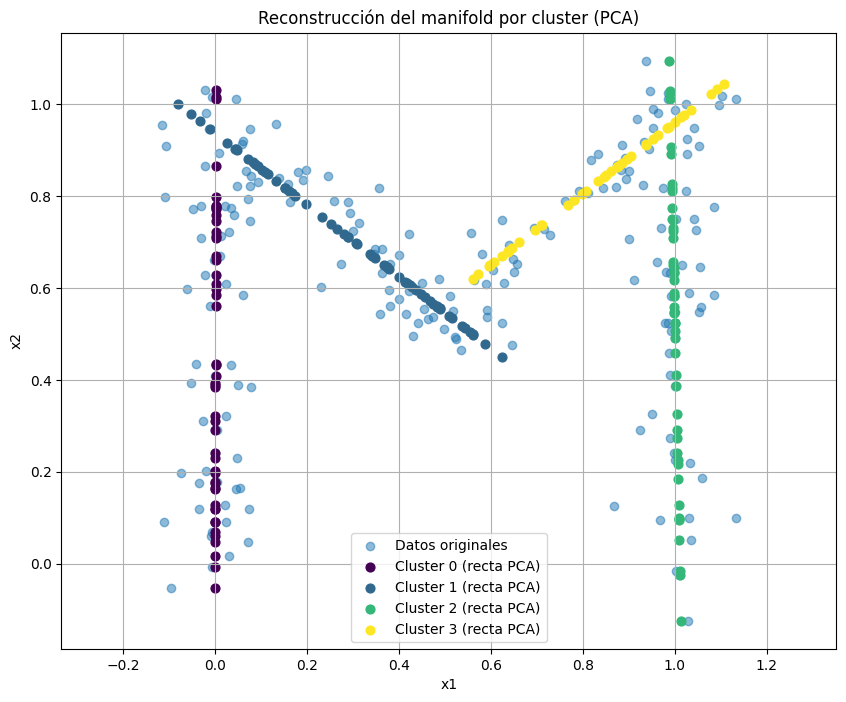

In [31]:
# Usando el algoritmo EM armo varios conjuntos, uno por cluster
colors = plt.cm.viridis(np.linspace(0, 1, em.K))  # Colores distintos por cluster
x_reconstruida = []
modelos_pca = []
u_min_max =[]

plt.figure(figsize=(10, 8))

plt.scatter(X[:, 0], X[:, 1], label='Datos originales', alpha=0.5)

for k, color in zip(range(em.K), colors):
    clusters = (predict_em == k)
    modelo_pca = PCA()
    modelo_pca.fit(X[clusters])
    U = modelo_pca.transform(X[clusters], k=1)
    modelos_pca.append(modelo_pca)
    u_min, u_max = np.min(U), np.max(U)
    u_min_max.append((u_min, u_max))
    print(f"Cluster {k}: min = {u_min:.3f}, max = {u_max:.3f}")
    x_reconstruida_k = modelo_pca.inverse_transform(U)
    x_reconstruida.append(x_reconstruida_k)
    #superpongo al scatter las rectas resultantes por pca
    plt.scatter(x_reconstruida_k[:, 0], x_reconstruida_k[:, 1],color=color, s=40, label=f'Cluster {k} (recta PCA)')

plt.title('Reconstrucción del manifold por cluster (PCA)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

**PCA:**


El algoritmo **PCA** busca reducir la dimensionalidad de los datos encontrando las **direcciones de máxima varianza** en el espacio original.  
En este caso, se utiliza para **proyectar puntos bidimensionales (2D) sobre una recta**, lo que permite representar el **manifold** de manera más compacta, conservando su estructura principal.

Primero, los datos se **centran respecto a su media** para eliminar desplazamientos y analizar solo la variación intrínseca.  
Luego se calcula la **matriz de covarianza**, que mide cómo se relacionan las variables entre sí.  
A partir de esta matriz se obtienen los **autovectores** (direcciones principales) y **autovalores** (magnitud de la varianza en cada dirección).  
El autovector con mayor autovalor indica la dirección sobre la que se realiza la proyección.

Una vez obtenidos los autovectores, se proyectan los datos centrados sobre los primeros k componentes principales (en este caso como se tienen 2 dimensiones, k = 1):

$$
U = (X - \hat{X}) · W
$$


donde:  
- $\hat{X}$ es el vector de medias,  
- W contiene los autovectores correspondientes a las direcciones de máxima varianza,  
- U son las coordenadas de los datos en el nuevo espacio reducido.

Esta transformación conserva la mayor parte de la información estadística con un número menor de dimensiones.

A partir de la representación reducida U, se puede volver al espacio original mediante la **reconstrucción inversa**:

$$
X_{reconstruido} = U · W' + \hat{X}
$$

Esto permite visualizar cómo quedarían los datos si solo se conservara la información correspondiente al componente principal.



En nuestro caso después de aplicar el algoritmo **EM (Expectation-Maximization)** para separar los datos en **varios clusters**, se entrena un **PCA independiente para cada cluster**.  
Cada PCA aprende la dirección principal local y proyecta los datos sobre una recta distinta, **capturando la geometría local** del conjunto.  

Posteriormente, con los **valores extremos** de cada proyección (U_min y U_max) y utilizando el método inverse_transform, se reconstruye la **recta correspondiente a cada cluster** en el espacio original.  
Al graficar cada una con un color distinto, se obtiene una representación visual del **manifold completo**, formada por tramos lineales que siguen la forma de los datos originales, de una manera mucho mas exacta que las estimadas previamente con K-Means o K-Means + EM.







**Detector de anomalias**

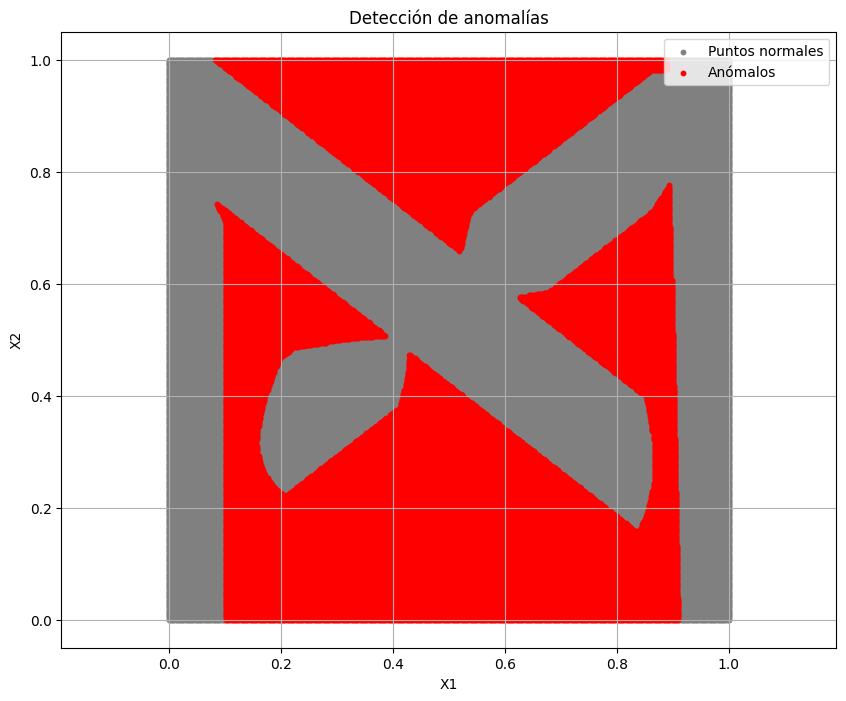

In [32]:
# Grilla de puntos en [0, 1] x [0, 1]
x_a = np.linspace(0, 1, 500)
y_a = np.linspace(0, 1, 500)
xx_a, yy_a = np.meshgrid(x_a, y_a)
grid_points_a = np.c_[xx_a.ravel(), yy_a.ravel()]

# Predicción del cluster para cada punto de la grilla
clusters_pred = em.predict(grid_points_a)

# Reconstrucción usando el PCA de cada cluster
reconstruidos = np.zeros_like(grid_points_a)
errores = np.zeros(len(grid_points_a))
umbral = 0.01
for i, x in enumerate(grid_points_a):
    k = clusters_pred[i]
    modelo_pca = modelos_pca[k]
    U = modelo_pca.transform(x.reshape(1, -1), k=1)
    x_rec = modelo_pca.inverse_transform(U)
    reconstruidos[i] = x_rec
    errores[i] = np.sum((x - x_rec)**2)

# Clasificación de anomalías (error > umbral)
anomalias = errores > umbral

# Graficar puntos normales vs anómalos
plt.figure(figsize=(10, 8))
plt.scatter(grid_points_a[~anomalias, 0], grid_points_a[~anomalias, 1],color='gray', s=10, label='Puntos normales')
plt.scatter(grid_points_a[anomalias, 0], grid_points_a[anomalias, 1],color='red', s=10, label='Anómalos')

plt.title('Detección de anomalías')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


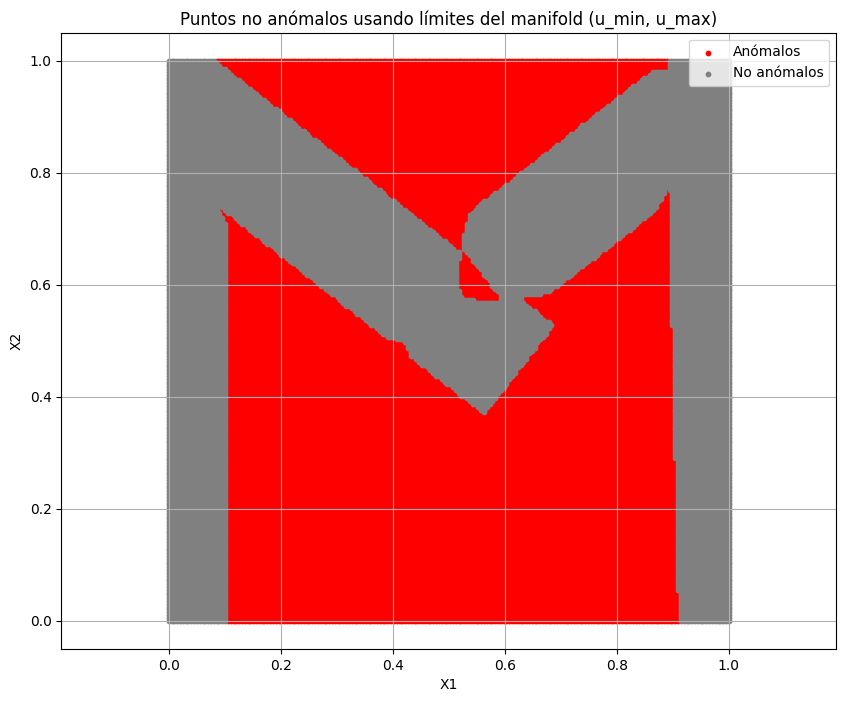

In [33]:

# Grilla de puntos
x_a = np.linspace(0, 1, 200)
y_a = np.linspace(0, 1, 200)
xx_a, yy_a = np.meshgrid(x_a, y_a)
grid_points_a = np.c_[xx_a.ravel(), yy_a.ravel()]

# Predicción del cluster y cálculo del error
clusters_pred = em.predict(grid_points_a)
errores2 = np.zeros(len(grid_points_a))
anomalias = np.zeros(len(grid_points_a), dtype=bool)

umbral_error = 0.01

for i, x in enumerate(grid_points_a):
    k = clusters_pred[i] #me quedo con la prediccion de ese punto
    modelo_pca = modelos_pca[k] #uso el modelo guardado
    u_min, u_max = u_min_max[k] # y los limites previamente calculados como segundo chequeo

    U = modelo_pca.transform(x.reshape(1, -1), k=1)
    x_rec = modelo_pca.inverse_transform(U)
    error = np.sum((x - x_rec)**2)
    anomalias[i] = (error > umbral_error) or (U < u_min) or (U > u_max)
    errores2[i] = error

# Graficar solo los puntos no anómalos
plt.figure(figsize=(10, 8))
plt.scatter(grid_points_a[anomalias, 0], grid_points_a[anomalias, 1],
            color='red', s=10, label='Anómalos')
plt.scatter(grid_points_a[~anomalias, 0], grid_points_a[~anomalias, 1],
            color='gray', s=10, label='No anómalos')
plt.title('Puntos no anómalos usando límites del manifold (u_min, u_max)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()




**Detector de Anomalías**

El objetivo de esta etapa es evaluar el desempeño del modelo como **detector de anomalías**.  
Se espera que los puntos del plano alejados del *manifold* (es decir, que no pueden reconstruirse bien por los PCA locales) sean clasificados como **anómalos**.


Se genera una **grilla de puntos** uniforme en el dominio y se construye el conjunto de prueba cada punto de la grilla se asocia a un **cluster** mediante el modelo EM entrenado
luego, para cada punto $\mathbf{x}_i$, se proyecta y reconstruye usando el PCA correspondiente al clúster $k$:

$$
\mathbf{u}_i = W_k^\top (\mathbf{x}_i - \boldsymbol{\mu}_k)
$$

$$
\hat{\mathbf{x}}_i = W_k \mathbf{u}_i + \boldsymbol{\mu}_k
$$

Luego con el error cuadrático de reconstrucción  que se define como:
$$
e_i = \|\mathbf{x}_i - \hat{\mathbf{x}}_i\|^2
$$

Se calcula la diferencia entre el punto reconstruido y el punto original, lo cual permite, mediante un umbral definir si un punto es anomalo o no.

**Segundo caso**


Además, puede aplicarse un **segundo criterio** de exclusión utilizando los valores extremos de la proyección $u_{\min}$ y $u_{\max}$ del manifold local, es decir que un punto no solo se denomina anomalo si su distancia es mayor al umbral, sino que tambien se denomina anomalo si se encuentra dentro de la extension de la direccion principal obtenida, esto se puede observar en el segundo grafico, donde luego de aplicar esta segunda condicion el detector empieza a funcionar de manera mas precisa con los datos utilizados.
